In [5]:
import os
import pandas as pd
import numpy as np
import tqdm.notebook as tqdm
import librosa
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt

file_names = [file.split('.')[0] for file in os.listdir('bee-not-bee/data')[::2]]

In [6]:
X = np.zeros(22050//10)
Y = np.zeros(1)

In [8]:
for file_name in tqdm.tqdm(file_names):
    audio_file, sample_rate = librosa.load('bee-not-bee/data/' + file_name +'.wav',
                                           sr=22050,
                                           mono=True,
                                           offset=0.0,
                                           duration=50,
                                           res_type='kaiser_best')
    for line in tqdm.tqdm(open('bee-not-bee/data/' + file_name + '.lab').readlines()[1:-1]):
        instance = line.strip('\n').split()
        start , end = int(float(instance[0])*22050), int(float(instance[1])*22050) 
        target_class = np.array([1 if instance[2]=='bee' else 0])
        
        for cs in range(start, end, 2205):
            try:
                X = np.vstack((X, audio_file[cs:cs+2205]))
                Y = np.vstack((Y, target_class))
            except:
                continue

        #print(instance)
        

In [9]:
np.save('Bee-Audio_X.npy', X)
np.save('Bee_Audio_Y.npy', Y)

In [12]:
Y.shape

(27048, 1)

In [10]:
X.shape

(27048, 2205)

In [13]:
Y_ = Y.reshape((27048))
Y_ = np.array(Y_, dtype = int)
''.join([str(ch) for ch in list(Y_)])

'011111111111111111111111111111111111111111111111111111111111111111111111110000001111111111111111111111111000111111111111111111111111111111111111111111111111110000000000000000011111111111111111111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111000000000000000000000000000000000001111111111111000000000000000000000000000000000000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100001111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [31]:
np.vstack((audio_file[0:2250], audio_file[0:2250]))

array([[ 0.00118591,  0.00211682,  0.00211967, ..., -0.00168129,
        -0.00123483, -0.00158095],
       [ 0.00118591,  0.00211682,  0.00211967, ..., -0.00168129,
        -0.00123483, -0.00158095]], dtype=float32)

In [3]:
import librosa
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt

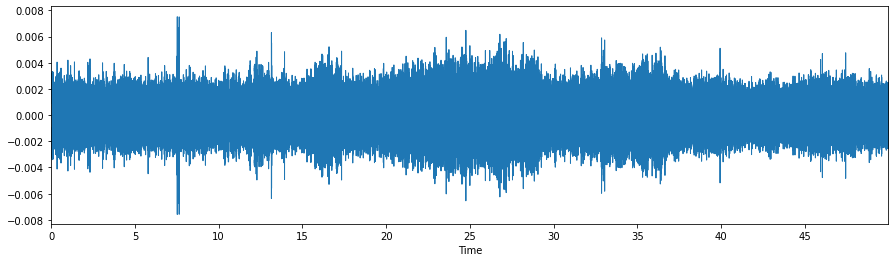

In [4]:
plt.figure(figsize=(15,4))
data,sample_rate = librosa.load('bee-not-bee/data/'+file_names[0]+'.wav', sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')
librosa.display.waveplot(data,sr=sample_rate, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

In [8]:
data.shape

(1102500,)

In [9]:
sample_rate

22050